In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
df = pd.read_csv("../data/processed/WineQT_after_EDA.csv")
df.drop(["Unnamed: 0", "quality", "Id"], axis=1, inplace=True)

In [5]:
X = df.drop(["quality_encoded"], axis=1)
y = df["quality_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train_t = torch.FloatTensor(X_train.values)
y_train_t = torch.LongTensor(y_train.values)
X_test_t = torch.FloatTensor(X_test.values)
y_test_t = torch.LongTensor(y_test.values)

In [10]:
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [18]:
class WineClassifier(nn.Module):
    def __init__(self, in_features=12, h1=128, h2=128, out_features=6):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2,out_features)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.out(x)

        return x

In [19]:
model = WineClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [20]:
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train_t)
    loss = criterion(y_pred, y_train_t)
    losses.append(loss.detach())
    if i%10==0:
        print(f'epoch {i} and loss is: {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 0 and loss is: 14.787882804870605
epoch 10 and loss is: 30.342084884643555
epoch 20 and loss is: 17.7811336517334
epoch 30 and loss is: 4.349654674530029
epoch 40 and loss is: 2.2520246505737305
epoch 50 and loss is: 1.7620936632156372
epoch 60 and loss is: 2.141494035720825
epoch 70 and loss is: 1.24420964717865
epoch 80 and loss is: 1.1953835487365723
epoch 90 and loss is: 1.1760156154632568


In [21]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'epoch')

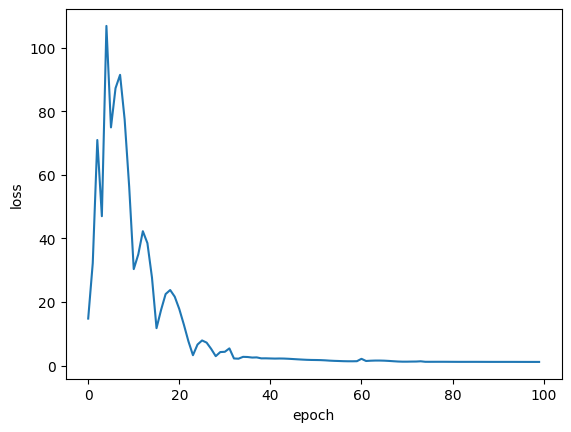

In [22]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epoch')

In [25]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test_t):
        y_val = model.forward(data)
        print(f'{i+1}) {str(y_val)} {y_test_t[i]}')
        if y_val.argmax().item() == y_test_t[i]:
            correct += 1

print(f'We got {correct} correct')

1) tensor([1.6791, 6.1070, 8.2950, 8.3095, 7.5811, 4.6358]) 4
2) tensor([1.1458, 4.0775, 5.9485, 5.8310, 5.2376, 3.2333]) 3
3) tensor([1.6325, 5.0911, 7.0966, 6.9455, 6.0884, 3.9295]) 2
4) tensor([-0.1992,  0.0662,  1.4046,  1.1495,  0.8144,  0.1112]) 2
5) tensor([2.4364, 7.6663, 9.3895, 9.4736, 8.6610, 5.7594]) 3
6) tensor([1.8842, 6.9750, 9.3125, 9.3898, 8.6428, 5.2622]) 4
7) tensor([ 3.3094, 10.2368, 14.0007, 13.7760, 12.3765,  7.8833]) 2
8) tensor([ 2.6195,  8.3792, 11.6000, 11.4280, 10.2305,  6.4284]) 3
9) tensor([0.3571, 0.9227, 0.9620, 0.9983, 0.5525, 0.6200]) 2
10) tensor([ 3.5160, 11.1437, 14.1597, 14.2047, 12.9323,  8.3544]) 2
11) tensor([1.3673, 5.0107, 7.0620, 7.0084, 6.3665, 3.8767]) 3
12) tensor([0.0425, 0.6183, 1.2457, 1.2029, 0.8724, 0.4764]) 2
13) tensor([ 2.3920,  8.0773, 10.6737, 10.6737,  9.8263,  6.1972]) 3
14) tensor([0.3025, 1.0772, 1.6263, 1.5548, 1.1529, 0.8165]) 1
15) tensor([ 3.1784,  9.7028, 13.1036, 12.8929, 11.6522,  7.5323]) 3
16) tensor([ 2.2850,  7.6447

In [ ]:
torch.save(model.state_dict(), '../models/my_wine_model.pt')